## Donor Charity Problem

### Business Problem Statement

The objective is to determine which set of potential donors the charity should contact to maximize the profitability of a marketing campaign to solicit donations for the charity.

### Import packages

#### You can use the below code to install packages within the script!

In [1]:
# Source : https://stackoverflow.com/questions/12332975/installing-python-module-within-code
def packageInstall(package):
    import importlib
    try:
        importlib.import_module(package)
    except ImportError:
        import pip
        pip.main(['install', package])
    finally:
        globals()[package] = importlib.import_module(package)

### Read the Datasets (Train and Test)

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read the dataset
df = pd.read_csv('data/train.csv', low_memory=False)
zipData = pd.read_csv('zipCodeMarketingCosts.csv', low_memory=False)
dfTest = pd.read_csv('data/test.csv', low_memory=False)

### Quick Analysis of the dataset

In [3]:
# Dimensions of the training and testing dataset
print('Training Data Shape : ', df.shape)
print('Testing Data Shape : ', dfTest.shape)
print('Percentage of Test Data : {}%'.format(int((len(dfTest) / (len(dfTest) + len(df))) * 100)))

Training Data Shape :  (182190, 481)
Testing Data Shape :  (9589, 482)
Percentage of Test Data : 5%


In [4]:
df.info() # It has three types of features - 'int64', 'float64' and 'object'!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182190 entries, 0 to 182189
Columns: 481 entries, date to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 668.6+ MB


In [5]:
df.describe()

,date,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,magfem,magmale,pubgardn,pubculin,pubhlth,pubdoity,pubnewfn,pubphoto,pubopp,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,adate_2,adate_3,adate_4,adate_5,adate_6,adate_7,adate_8,adate_9,adate_10,adate_11,adate_12,adate_13,adate_14,adate_15,adate_16,adate_17,adate_18,adate_19,adate_20,adate_21,adate_22,adate_23,adate_24,cardprom,maxadate,numprom,cardpm12,numprm12,rdate_3,rdate_4,rdate_5,rdate_6,rdate_7,rdate_8,rdate_9,rdate_10,rdate_11,rdate_12,rdate_13,rdate_14,rdate_15,rdate_16,rdate_17,rdate_18,rdate_19,rdate_20,rdate_21,rdate_22,rdate_23,rdate_24,ramnt_3,ramnt_4,ramnt_5,ramnt_6,ramnt_7,ramnt_8,ramnt_9,ramnt_10,ramnt_11,ramnt_12,ramnt_13,ramnt_14,ramnt_15,ramnt_16,ramnt_17,ramnt_18,ramnt_19,ramnt_20,ramnt_21,ramnt_22,ramnt_23,ramnt_24,ramntall,ngiftall,cardgift,minramnt,minrdate,maxramnt,maxrdate,lastgift,lastdate,fistdate,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2
count,182190.000000,182190.000000,182190.000000,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,81303.000000,81192.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,81303.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,98515.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.00

### Minor preprocessing for 'zip' and 'date' columns

In [0]:
from imports import *
import re

# Remove special charecters from zip of train set
df['zip'] = pd.Series([re.sub('[^A-Za-z0-9]+', '', zipcode) for zipcode in df['zip']])
df['zip'] = pd.to_numeric(df['zip'])
df = pd.merge(df, zipData, on='zip')

# Remove special charecters from zip of test set
dfTest['zip'] = pd.Series([re.sub('[^A-Za-z0-9]+', '', zipcode) for zipcode in dfTest['zip']])
dfTest['zip'] = pd.to_numeric(dfTest['zip'])
dfTest = pd.merge(dfTest, zipData, on='zip')

# Processing Date column
df['date'] = df['date'].apply(lambda x: int(x/100))
dfTest['date'] = dfTest['date'].apply(lambda x: int(x/100))

### Let's see what are the columns specific to train and test data!

In [7]:
trainCols = list(df.columns)
testCols = list(dfTest.columns)

trainSpecificCols = []
for col in trainCols:
    if col not in testCols:
        trainSpecificCols.append(col)
print('Train Specific Columns : ', trainSpecificCols)

testSpecificCols = []
for col in testCols:
    if col not in trainCols:
        testSpecificCols.append(col)
print('Test Specific Colums : ', testSpecificCols)

Train Specific Columns :  ['responded', 'amount']
Test Specific Colums :  ['market']


### Dropping 'market' column now. Will be adding it later when we get the predictions!

In [8]:
dfTest = dfTest.drop(columns = ['market'], axis=1)
dfTest.shape

(9589, 480)

### Now, the interesting part is to look at the class labels!

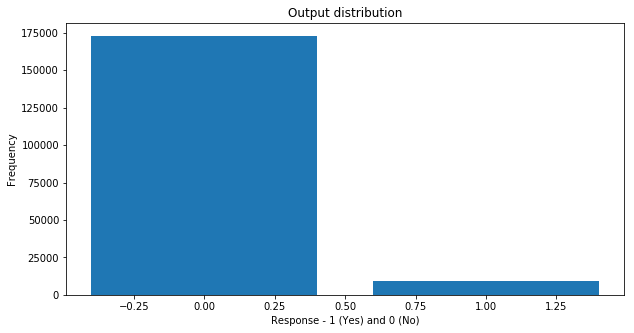

In [10]:
import matplotlib.pyplot as plt

output = df['responded'].value_counts()
labels = output.index
values = output.values

plt.figure(figsize=(10, 5))
plt.title('Output distribution')
plt.xlabel('Response - 1 (Yes) and 0 (No)')
plt.ylabel('Frequency')
plt.bar(labels, values)
plt.show(True)

### Whoa! We are working with imbalanced data! 
If we model it the way it is right now, something like shown in the video below is going to happen!

In [1]:
import io
import base64
from IPython.display import HTML

video = io.open('imbalancedExample.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

### There's no point in using rows with class label missing! Drop those rows!

In [13]:
import numpy as np

print('Before dropping rows with missing values in RESPONDED columns', df.shape)
df = df[np.isfinite(df['responded'])]
print('After dropping rows with missing values in RESPONDED columns', df.shape)

Before dropping rows with missing values in RESPONDED columns (182190, 482)
After dropping rows with missing values in RESPONDED columns (182190, 482)


### Let's check for missing values in the dataset

In [14]:
totalMissing = df.isnull().sum().sort_values(ascending = False)
percentMissing = ((df.isnull().sum())/(df.isnull().count()) * 100).sort_values(ascending = False)
missing = pd.concat([totalMissing, percentMissing], axis=1, keys=['Total_Missing_Values', 'Percent_Missing_Values'])
missing

,Total_Missing_Values,Percent_Missing_Values
rdate_5,182173,99.990669
ramnt_5,182173,99.990669
rdate_3,181721,99.742576
ramnt_3,181721,99.742576
rdate_4,181653,99.705253
ramnt_4,181653,99.705253
rdate_6,180723,99.194797
ramnt_6,180723,99.194797
amount,172941,94.923432
ramnt_15,168325,92.389813


### Preprocessing the dataset (Filling missing values and Handling Categorical values)

In [15]:
integerData = df.select_dtypes(include=['int64']).fillna(0)
floatData = df.select_dtypes(include=['float64']).fillna(0.0)
combinedData = pd.concat([integerData, floatData], axis=1)

catData = df.select_dtypes(include=['object'])
catData = catData.loc[:, catData.isin([' ','NULL',0, np.NaN]).mean() < .6]
catData = catData.fillna(catData.mode().iloc[0])
catData = catData.replace(['', ' ', None], np.NAN)

for x in catData.columns:
    uniqueValues = catData[x].unique()
    mapping = dict(zip(uniqueValues, np.arange(float(len(uniqueValues)))))
    catData[x] = catData[x].map(mapping)
    
integerTestData = dfTest.select_dtypes(include=['int64']).fillna(0)
floatTestData = dfTest.select_dtypes(include=['float64']).fillna(0.0)
combinedTestData = pd.concat([integerTestData, floatTestData], axis=1)

catTestData = dfTest.select_dtypes(include=['object'])
catTestData = catTestData.loc[:, catTestData.isin([' ','NULL',0, np.NaN]).mean() < .6]
catTestData = catTestData.fillna(catTestData.mode().iloc[0])
catTestData = catTestData.replace(['', ' ', None], np.NAN)

for x in catTestData.columns:
    uniqueValues = catTestData[x].unique()
    mapping = dict(zip(uniqueValues, np.arange(float(len(uniqueValues)))))
    catTestData[x] = catTestData[x].map(mapping)

### Dimentionality Reduction using PCA for Categorical Features

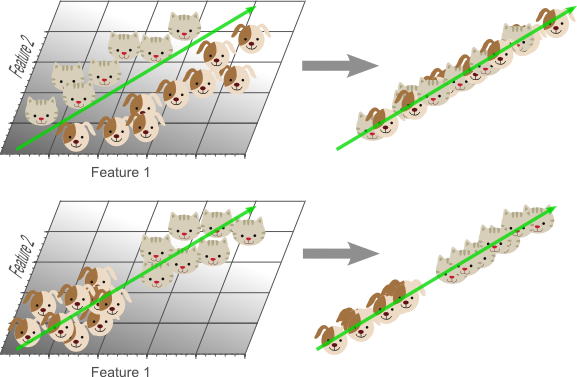

In [16]:
from IPython.display import Image
Image(filename = "pcs.png", width=750, height=750)

In [17]:
# Train Categorical Features Reduction
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledCatData = scaler.fit_transform(catData)

# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
catData = pca.fit_transform(scaledCatData)

explainedVariance = pca.explained_variance_ratio_
print("Tarin Explained Variance : ", sum(explainedVariance))

# Test Categorical Features Reduction
scalerTest = StandardScaler()
scaledCatTestData = scalerTest.fit_transform(catTestData)

# Principal Component Analysis
from sklearn.decomposition import PCA
pcaTest = PCA(n_components=10)
catTestData = pcaTest.fit_transform(scaledCatTestData)

explainedVarianceTest = pcaTest.explained_variance_ratio_
print("Test Explained Variance : ", sum(explainedVarianceTest))

Tarin Explained Variance :  0.5976990442516599
Test Explained Variance :  0.6173994358330981


#### The maximum variance is more than 50% (good enough for reduction using 10 Principal Components)

In [18]:
catData = pd.DataFrame(catData)
catColumns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10']
catData.columns = catColumns

scalerFloat = StandardScaler()
columnsFloat = floatData.columns
scaledFloatData = scalerFloat.fit_transform(floatData)
df1 = pd.DataFrame(scaledFloatData)
df1.columns = columnsFloat

scalerInt = StandardScaler()
columnsInt = integerData.columns
scaledIntegerData = scalerInt.fit_transform(integerData)
df2 = pd.DataFrame(scaledIntegerData)
df2.columns = columnsInt

dataset = pd.concat([df1, df2, catData], axis=1)
dataset.shape

(182190, 419)

In [19]:
catTestData = pd.DataFrame(catTestData)
catTestColumns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10']
catTestData.columns = catTestColumns

scalerTestFloat = StandardScaler()
columnsTestFloat = floatTestData.columns
scaledFloatTestData = scalerTestFloat.fit_transform(floatTestData)
df1 = pd.DataFrame(scaledFloatTestData)
df1.columns = columnsTestFloat

scalerTestInt = StandardScaler()
columnsTestInt = integerTestData.columns
scaledIntegerTestData = scalerTestInt.fit_transform(integerTestData)
df2 = pd.DataFrame(scaledIntegerTestData)
df2.columns = columnsTestInt

datasetTest = pd.concat([df1, df2, catTestData], axis=1)
datasetTest.shape

(9589, 417)

In [20]:
def modifyY(entry):
    if entry < 0:
        return 0
    else:
        return 1
    
dataset['responded'] = dataset['responded'].apply(modifyY)

### Preparing the data for modelling

In [21]:
y = dataset['responded']
influencingY = dataset['amount']
X = dataset.drop(columns=['responded', 'amount'], axis=1)
dataset = dataset.drop(columns=['amount'], axis=1)
testX = datasetTest

### My Approach to handle data imbalance : Undersampling 

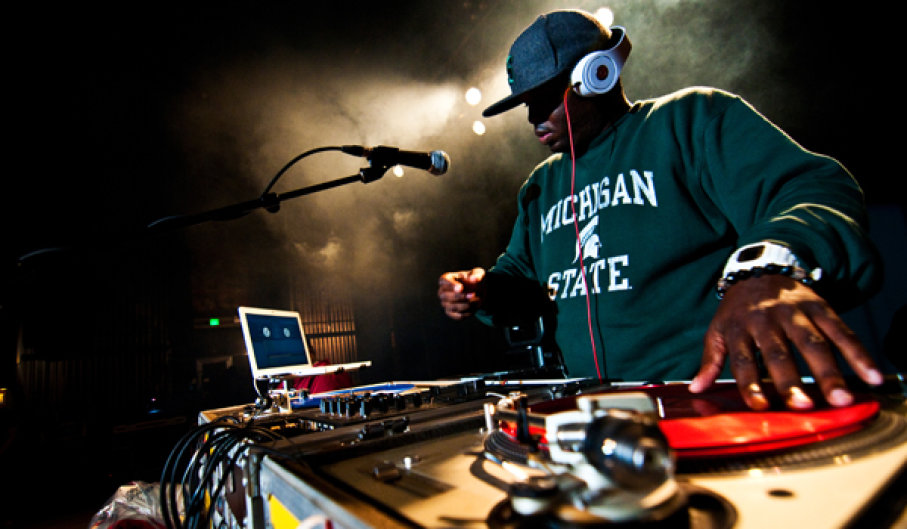

In [22]:
from IPython.display import Image
Image(filename = "sampling.jpg", width=750, height=750)

In [23]:
# Number of data points in the minority class
positiveResponse = len(dataset[dataset.responded == 1])
positiveResponseIndices = np.array(dataset[dataset.responded == 1].index)

# Picking the indices of the normal classes
negativeResponse = dataset[dataset.responded == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
sampledNegative = np.random.choice(negativeResponse, positiveResponse, replace = False)
randomSampledNegative = np.array(sampledNegative)

# Appending the 2 indices
sampledDataset = np.concatenate([positiveResponseIndices, randomSampledNegative])

# Under sample dataset
sampledData = dataset.iloc[sampledDataset, :]

sampledDataX = sampledData.loc[:, sampledData.columns != 'responded']
sampledDataY = sampledData.loc[:, sampledData.columns == 'responded']

# Showing ratio
print("Percentage of Negative Responses : ", len(sampledData[sampledData.responded == 0])/len(sampledData))
print("Percentage of Positive Responses : ", len(sampledData[sampledData.responded == 1])/len(sampledData))
print("Total number of Customers in Sampled Dataset : ", len(sampledData))

Percentage of Negative Responses :  0.5
Percentage of Positive Responses :  0.5
Total number of Customers in Sampled Dataset :  18498


### Split the data for our modelling

In [34]:
from sklearn.model_selection import train_test_split

# Whole dataset
xTrain, yTrain, xTest, yTest = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number of customers in train dataset: ", len(xTrain))
print("Number of customers in test dataset: ", len(xTest))
print("Total number of customers : ", len(xTrain)+len(xTest))

# Undersampled dataset
xTrainSampled, xTestSampled, yTrainSampled, yTestSampled = train_test_split(sampledDataX, sampledDataY, test_size=0.3, random_state=0)
print("\nNumber of customers in train dataset: ", len(xTrainSampled))
print("Number of customers in test dataset: ", len(xTestSampled))
print("Total number of customers : ", len(xTrainSampled)+len(xTestSampled))

Number of customers in train dataset:  127533
Number of customers in test dataset:  127533
Total number of customers :  255066

Number of customers in train dataset:  12948
Number of customers in test dataset:  5550
Total number of customers :  18498


### Hyperparameters tuning using K-fold Cross-Validation (C Parameter for Logistic Regression)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

C:\Users\SRIRAM VETURI\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.001, 0.01, 0.1]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [27]:
best_c = printing_Kfold_scores(xTrainSampled, yTrainSampled)
print(best_c)
bestRecall = max(pd.Series(best_c['Mean recall score']))
best_c = best_c.loc[best_c['Mean recall score'] == bestRecall, 'C_parameter'].iloc[0]

-------------------------------------------
C parameter:  0.001
-------------------------------------------

Iteration  1 : recall score =  0.5252525252525253
Iteration  2 : recall score =  0.5386973180076629
Iteration  3 : recall score =  0.53828125
Iteration  4 : recall score =  0.5155038759689923
Iteration  5 : recall score =  0.5210332103321034

Mean recall score  0.5277536359122568

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.6060606060606061
Iteration  2 : recall score =  0.5977011494252874
Iteration  3 : recall score =  0.64140625
Iteration  4 : recall score =  0.6116279069767442
Iteration  5 : recall score =  0.5616236162361624

Mean recall score  0.60368390573976

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5804195804195804
Iteration  2 : recall score =  0.5900383141762452
Iteration  3 :

Best C parameter is 0.01

### Confusion matrix plot

In [28]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression to predict if the customer would donate!

Recall metric in the testing dataset:  0.5644216691068814


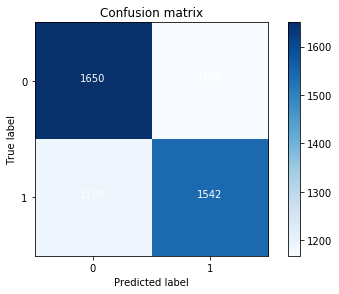

In [29]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(xTrainSampled,yTrainSampled.values.ravel())
yPredSampled = lr.predict(xTestSampled.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(yTestSampled,yPredSampled)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Plotting ROC Curve

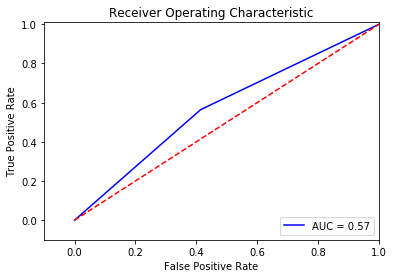

In [30]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(xTrainSampled,yTrainSampled.values.ravel()).decision_function(xTestSampled.values)

fpr, tpr, thresholds = roc_curve(yTestSampled.values.ravel(),yPredSampled)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Make Predictions on the given 'Test Data'!

In [31]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(xTrainSampled,yTrainSampled.values.ravel())
yPredSampled = lr.predict(testX.values)

### Add a column 'market' with the predictions and convert to CSV format!

In [36]:
dfTest['market'] = pd.Series(yPredSampled)
dfTest.to_csv('results/test.csv')

### Extended analysis of predictions!

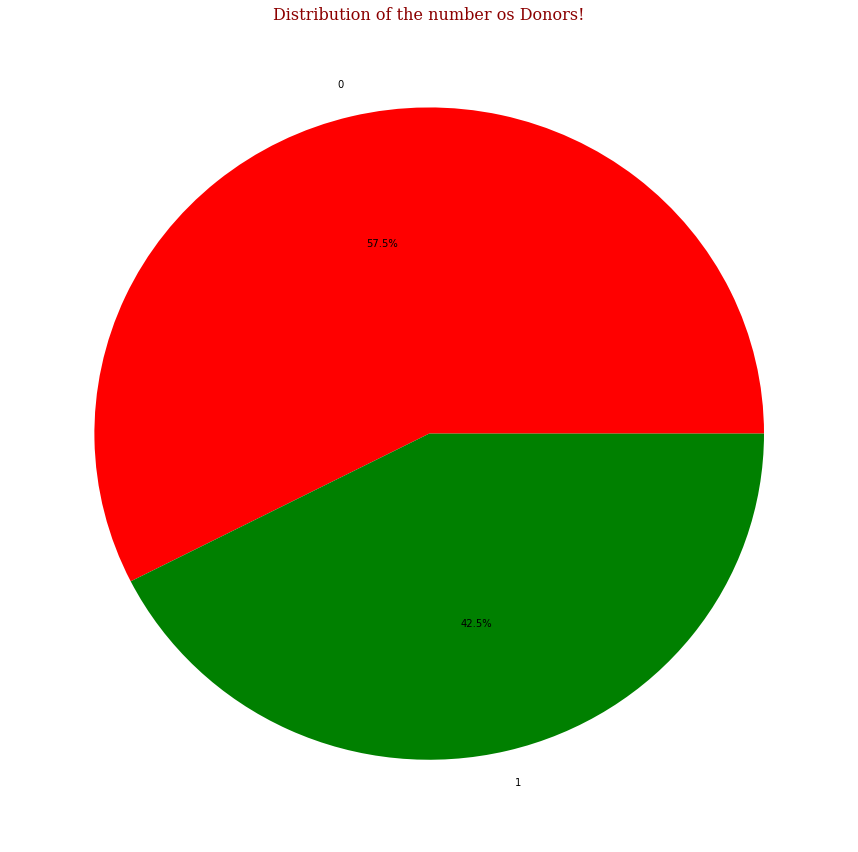

In [39]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

donorsInfo = dfTest['market'].value_counts()
labels = donorsInfo.index
values = donorsInfo.values
colors = ['r', 'g']
plt.figure(figsize=(15, 15))
plt.title('Distribution of the number os Donors!', fontdict=font)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show(True)

### According to my predictions, 42.5% of the customers in the test data are likely to make donation to the charity based on all the features of the customers in the dataset.

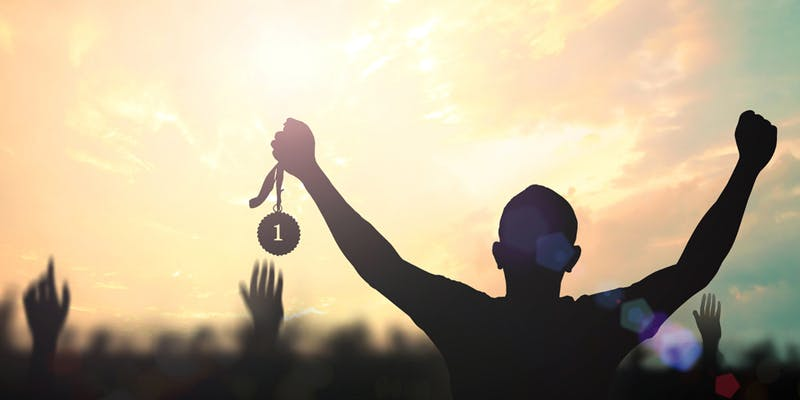

In [41]:
from IPython.display import Image
Image(filename = "winner.jpg", width=1000, height=750)